Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import tensorflow

Load Cifar-10 Data

In [ ]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [ ]:
#size
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

Visualize Data

The label data is just a list of 60,000 numbers ranging from 0 to 9, which corresponds to each of the 10 classes in CIFAR-10.

airplane : 0
automobile : 1
bird : 2
cat : 3
deer : 4
dog : 5
frog : 6
horse : 7
ship : 8
truck : 9

In [ ]:
i = 1023
plt.imshow(X_train[i])
class_dict = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}
print("Label :",class_dict[y_train[i][0]])

In [ ]:
#view multiple images
width = 15
length = 15

fig , axes = plt.subplots(length, width , figsize = (25,25))
axes = axes.ravel()

n_train = X_train.shape[0]
for i in np.arange(0, length*width):
    index = np.random.randint(0, n_train)
    axes[i].set_title(class_dict[y_train[index][0]])
    axes[i].imshow(X_train[index])
    axes[i].axis('off')

Data Preparation

In [ ]:
#converting to float
X_train_fl = X_train.astype('float32')
X_test_fl = X_test.astype('float32')
class_dict = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

In [ ]:
#making output as sparse matrix
import keras
y_train = keras.utils.np_utils.to_categorical(y_train,len(class_dict))
y_test = keras.utils.np_utils.to_categorical(y_test,len(class_dict))

In [ ]:
#converting pixel values to 0 to 1 (black and white)
X_train_scaled = X_train_fl/255
X_test_scaled = X_test_fl/255

In [ ]:
#preparing input data variable
Input_shape = X_train_scaled.shape[1:]

Training Model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , AveragePooling2D, Dense ,  Flatten , Dropout
from keras.optimizers import adadelta_experimental
from keras.callbacks import TensorBoard #i used keras as an API for tensorflow so to rely on tensorflow while teaining model use this library

In [ ]:
#skeleton of model
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=64, kernel_size= (3,3), activation= 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters=64, kernel_size= (3,3), activation= 'relu'))
cnn_model.add(MaxPooling2D(3,3))
cnn_model.add(Dropout(0.3))
cnn_model.add(Conv2D(filters=64, kernel_size= (3,3), activation= 'relu'))
cnn_model.add(Conv2D(filters=64, kernel_size= (3,3), activation= 'relu'))
cnn_model.add(MaxPooling2D(3,3))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())
cnn_model.add(Dense(units= 512, activation='relu'))
cnn_model.add(Dense(units= 512, activation='relu'))
cnn_model.add(Dense(units=10, activation='softmax'))

In [ ]:
#looking at skeleton of model
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 9, 9, 64)          0         
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 conv2d_7 (Conv2D)           (None, 5, 5, 64)          36928     
                                                      

In [ ]:
#compiling model
cnn_model.compile(loss = 'categorical_crossentropy', optimizer= tensorflow.keras.optimizers.RMSprop(learning_rate = 0.001), metrics=['accuracy'])

In [ ]:
#fitting the model
history = cnn_model.fit(X_train_scaled, y_train , batch_size=32, epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 11s 6ms/step - loss: 1.7574 - accuracy: 0.3496
Epoch 2/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4129 - accuracy: 0.5000
Epoch 3/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2890 - accuracy: 0.5530
Epoch 4/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2229 - accuracy: 0.5817
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1859 - accuracy: 0.5939
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1632 - accuracy: 0.6041
Epoch 7/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1555 - accuracy: 0.6122
Epoch 8/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1479 - accuracy: 0.6111
Epoch 9/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1490 - accuracy: 0.6148
Epoch 10/20
1563/1563 [==============================] - 10s 6ms/step - l

Evaluate Model

In [ ]:
#checking model accuracy with test values
evaluation = cnn_model.evaluate(X_test_scaled,y_test)
print("Testr Accuracy: {}".format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.9717 - accuracy: 0.6758
Testr Accuracy: 0.6758000254631042


In [ ]:
#predictiong againest test values
predict_class = cnn_model.predict(X_test_scaled)
predicted_classes = np.argmax(predict_class,axis=1)
predicted_classes

array([3, 8, 1, ..., 5, 1, 7])

In [ ]:
#bring back ground truth of test labels
y_test = y_test.argmax(1)

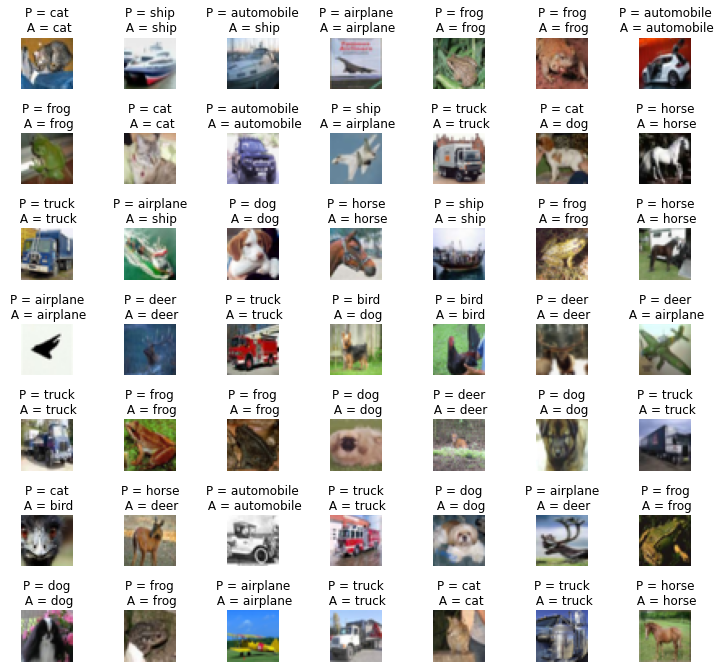

In [ ]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('P = {}\n A = {}'.format(class_dict[predicted_classes[i]],class_dict[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)
    

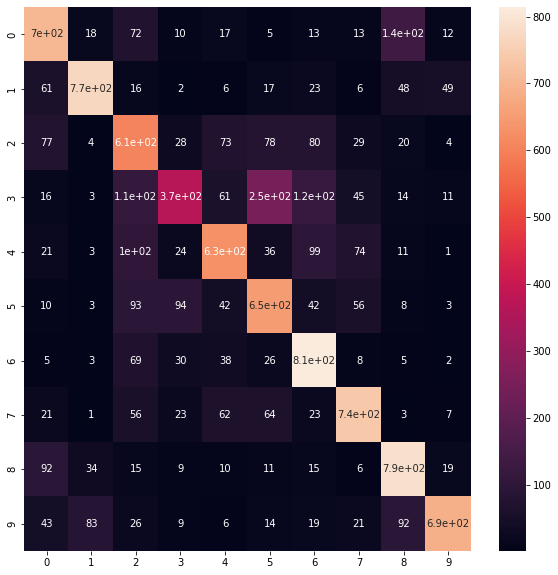

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test,predicted_classes)
plt.figure(figsize = (10,10))
sns.heatmap(cm,annot = True)

Saving the model

In [ ]:
import os
dir = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(dir):
    os.makedirs(dir)
model_path = os.path.join(dir, 'keras_cifar10_trained_model_20epoch.h5')
cnn_model.save(model_path)

Image Augmentation

In [ ]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train/=255
X_test/=255

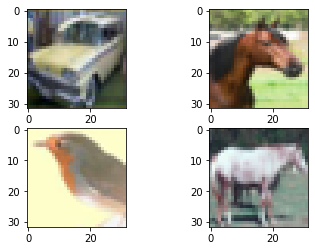

In [ ]:
#Original Images
datagen = ImageDataGenerator()
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=4, seed=1136):
  for i in range(0,4):
    pyplot.subplot(220 +1 +i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break

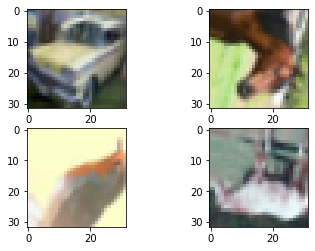

In [ ]:
#Rotating Images
datagen = ImageDataGenerator(rotation_range=359)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=4, seed=1136):
  for i in range(0,4):
    pyplot.subplot(220 +1 +i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break

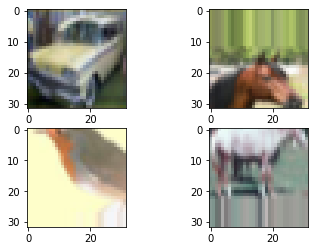

In [ ]:
#Vertical Scroll
datagen = ImageDataGenerator(height_shift_range=0.5)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=4, seed=1136):
  for i in range(0,4):
    pyplot.subplot(220 +1 +i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


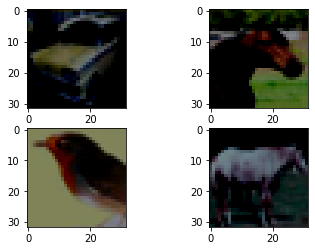

In [ ]:
#Featurewise Center
datagen = ImageDataGenerator(featurewise_center=True)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=4, seed=1136):
  for i in range(0,4):
    pyplot.subplot(220 +1 +i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break

Model training using image augmentation